## Classification of texts - Sentiment Analysis

In [122]:
#Open corpus
f = open("/content/analise-sentimentos-2000-noticias.txt", "r", encoding="utf-8-sig")
lines = f.readlines()

corpus_texts = []
corpus_labels = []

#Loop through 2000 lines
for line in lines:

  #Separate text and label/category/emotion
  item = line.split(";;")

  corpus_labels.append(item[0])
  corpus_texts.append(item[1])

In [123]:
#5 first texts
corpus_texts[0:5]

['irã liberta viúva condenada ao apedrejamento, diz comitê internacional. a viúva iraniana sakineh mohammadi-ashtiani, condenada à morte por apedrejamento, foi libertada juntamente com o seu filho e o seu advogado, anunciou nesta quinta-feira (9) o comitê internacional contra apedrejamento, sediado na alemanha.\n',
 'haiti sofre com cólera depois da passagem do furacão sandy. após a passagem do furacão sandy pelo haiti, o país vive as dificuldades da reconstrução, além de problemas causados pela contaminação da bactéria que causa o cólera.\n',
 'mulher acorda e encontra crocodilo de 3 m e 27 ovos no jardim de casa. especialistas capturaram e transferiram animal para local adequado.\n',
 'enchentes causam a morte de 4 pessoas em al: vítimas são mãe, filho, idosa de 100 anos e adolescente. defesa civil da capital já registrou mais de 30 ocorrências.\n',
 'sem detalhes do que será discutido, revisão do plano diretor começa na segunda (17). dez oficinas, 19 audiências públicas e canal inte

In [124]:
#5 first labels
corpus_labels[0:5]

['alegria', 'tristeza', 'surpresa', 'tristeza', 'neutro']

In [125]:
from sklearn.model_selection import train_test_split

#Sklearn itself has a method to split the database into training and testing
#In this case we are using 90% for training and 10% for testing
corpus_training, corpus_test, training_labels, test_labels = train_test_split(corpus_texts, corpus_labels, test_size=0.10, random_state=42)

In [126]:
len(corpus_training)

1800

In [127]:
len(corpus_test)

200

In [128]:
len(training_labels)

1800

In [129]:
len(test_labels)

200

In [ ]:
#Function to pre-process the texts

In [130]:
import nltk
from nltk import tokenize
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese') #Load Portuguese language stopwords available in NLTK
stopwords += (',','.','(',')','"',"'",'´','`','!','$','%','&','...','-',':',';','?','``','\'\'') #Add symbols
stopwords += ('a','e','i','o','u','A','E','I','O','U') #Add vowels

stemmer = nltk.stem.RSLPStemmer()

def my_preprocessor(text):
    
    #Normalize to lower case
    text=text.lower() 
    
    #Tokenize
    words = tokenize.word_tokenize(text, language='portuguese')
    #Remove stop-words
    words_no_stopwords = [word for word in words if not word in stopwords]
    #Apply stemming
    stemmed_words=[stemmer.stem(word=word) for word in words_no_stopwords]
    return ' '.join(stemmed_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Extract the text attributes (generate the vector representation - bag of words) and create the classification pipeline using the SVM classifier.

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

#Apply BoW first, then send data to SVM classifier
#(WITHOUT removing stop-words and stemming)
sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])

#After running it once, check the results and compare them after uncommenting the line below where we removed the stop-words and applied stemming
#(WITH removal of stop-words and stemming)
sent_clf = Pipeline([('vect', CountVectorizer(preprocessor = my_preprocessor)), ('clf', SVC(kernel='linear', C=1))])

In [137]:
#Start training
sent_clf = sent_clf.fit(corpus_training, training_labels)

In [138]:
#Predict test base
predicted_labels = sent_clf.predict(corpus_test)

In [139]:
from sklearn.metrics import classification_report

#Show full metrics report
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

     alegria       0.14      0.11      0.12        19
    desgosto       0.55      0.44      0.49        27
        medo       0.36      0.44      0.40        18
      neutro       0.63      0.75      0.68        51
       raiva       0.33      0.29      0.31         7
    surpresa       0.48      0.50      0.49        32
    tristeza       0.72      0.67      0.70        46

    accuracy                           0.55       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.54      0.55      0.54       200



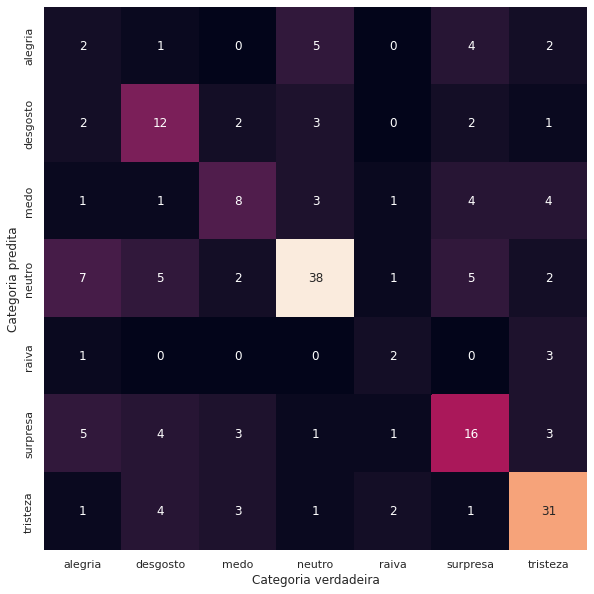

In [140]:
from sklearn.metrics import confusion_matrix

#Print the confusion matrix to try to better understand the results
mat = confusion_matrix(test_labels, predicted_labels)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

labels_names = ['alegria', 'desgosto', 'medo', 'neutro', 'raiva', 'surpresa', 'tristeza']

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels_names, yticklabels=labels_names )
plt.xlabel('True category')
plt.ylabel('Predicted category');

> **CONCLUSION**: Although we noticed improvement when pre-processing the text, the results are still regular.

####  How can we try to improve results?

#### **Analysis**

**1) Reduction of the granularity of feelings**

**2) Configuration of attribute extraction and classifier parameters**

**3) Add new attribute extraction or pre-processing steps**


In the next cells of the notebook are all the new tests performed.

The first test was to fix the new notebook, replacing the label "joy" with "positive", "anger", "fear", "disgust" and "sadness" with "negative". The "neutral" labels remain and all instances labeled "surprise" have been dropped from the txt.

Also, the new file was loaded and the results were compared.

Follow the results of the first one without any changes in the test code:

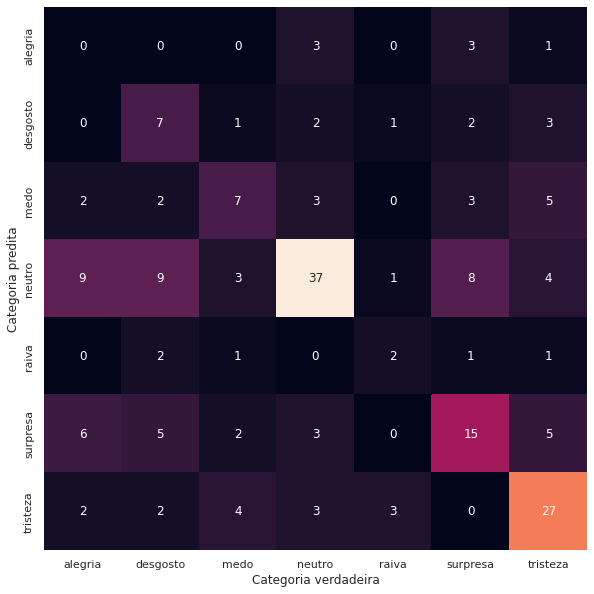


    precision     recall    f1-score   support

     alegria       0.00      0.00      0.00        19
    desgosto       0.44      0.26      0.33        27
        medo       0.32      0.39      0.35        18
      neutro       0.52      0.73      0.61        51
       raiva       0.29      0.29      0.29         7
    surpresa       0.42      0.47      0.44        32
    tristeza       0.66      0.59      0.62        46
    accuracy                           0.48       200
   macro avg       0.38      0.39      0.38       200
weighted avg       0.45      0.47      0.45       200



After finish the first step of the activity and loading the new database, the results improved, as shown below:



    precision    recall    f1-score   support

    negativo       0.86      0.85      0.85       110
      neutro       0.66      0.71      0.69        52
    positivo       0.64      0.54      0.58        13
    accuracy                           0.78       175
   macro avg       0.72      0.70      0.71       175
weighted avg       0.78      0.78      0.78       175


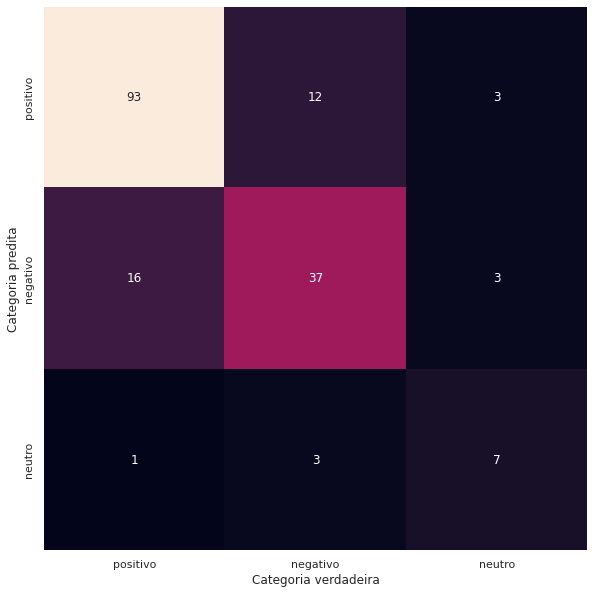



After finish the extraction and add the configuration of the TF-IDF in the new database. The results were even better, demonstrating that the adjustments made to the model were effective:

    precision    recall   f1-score   support
    negativo       0.87      0.88      0.88       110
      neutro       0.68      0.79      0.73        52
    positivo       0.75      0.23      0.35        13

    accuracy                           0.81       175
   macro avg       0.77      0.63      0.65       175
weighted avg       0.81      0.81      0.80       175

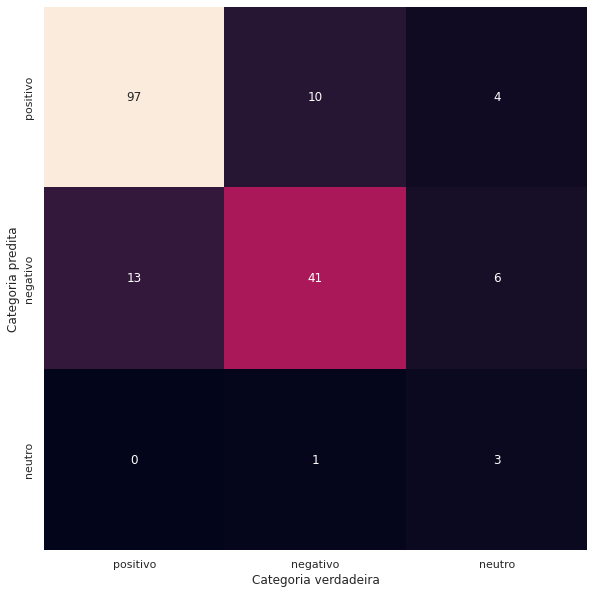


In the end, a new classifier was used (The Naive Bayes), that shows the following results:

    precision    recall  f1-score   support
    negativo       0.58      1.00      0.73       912
      neutro       0.00      0.00      0.00       490
    positivo       0.00      0.00      0.00       171
    accuracy                           0.58      1573
   macro avg       0.19      0.33      0.24      1573
weighted avg       0.34      0.58      0.43      1573



[[912   0   0]
 [490   0   0]
 [171   0   0]]


The results of Naive Bayes were not as good as those of the last SVM test, showing that so far SVM is the most suitable classifier and that Naive Bayes will need possible adjustments, corrections and tests.

In [142]:
#Open corpus
f2 = open("/content/analise-sentimentos-2000-2.txt", "r", encoding="utf-8-sig")
lines2 = f2.readlines()

corpus_texts2 = []
corpus_labels2 = []

#Loop through 2000 lines
for line in lines2:

  #Separate text and label/category/emotion
  item = line.split(";;")

  corpus_labels2.append(item[0])
  corpus_texts2.append(item[1])

In [143]:
#5 first texts
corpus_texts2[0:5]

['irã liberta viúva condenada ao apedrejamento, diz comitê internacional. a viúva iraniana sakineh mohammadi-ashtiani, condenada à morte por apedrejamento, foi libertada juntamente com o seu filho e o seu advogado, anunciou nesta quinta-feira (9) o comitê internacional contra apedrejamento, sediado na alemanha.\n',
 'haiti sofre com cólera depois da passagem do furacão sandy. após a passagem do furacão sandy pelo haiti, o país vive as dificuldades da reconstrução, além de problemas causados pela contaminação da bactéria que causa o cólera.\n',
 'enchentes causam a morte de 4 pessoas em al: vítimas são mãe, filho, idosa de 100 anos e adolescente. defesa civil da capital já registrou mais de 30 ocorrências.\n',
 'sem detalhes do que será discutido, revisão do plano diretor começa na segunda (17). dez oficinas, 19 audiências públicas e canal interativo serão os meios de participação popular; ippuc pretende enviar plano revisado à câmara até o início de dezembro\n',
 'chávez apresenta neto

In [144]:
#5 first labels
corpus_labels2[0:5]

['positivo', 'negativo', 'negativo', 'neutro', 'neutro']

In [145]:
from sklearn.model_selection import train_test_split

#Sklearn itself has a method to split the database into training and testing
#In this case we are using 90% for training and 10% for testing

corpus_training2, corpus_test2, training_labels2, test_labels2 = train_test_split(corpus_texts2, corpus_labels2, test_size=0.10, random_state=42)

In [146]:
len(corpus_training2)

1573

In [147]:
len(corpus_test2)

175

In [148]:
len(training_labels2)

1573

In [149]:
len(test_labels2)

175

In [150]:
import nltk
from nltk import tokenize
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('portuguese') #Load Portuguese language stopwords available in NLTK
stopwords += (',','.','(',')','"',"'",'´','`','!','$','%','&','...','-',':',';','?','``','\'\'') #Add symbols
stopwords += ('a','e','i','o','u','A','E','I','O','U') #Add vowels

stemmer = nltk.stem.RSLPStemmer()

def my_preprocessor(text):
    
    #Normalize to lower case
    text=text.lower() 
    
    #Tokenize
    words = tokenize.word_tokenize(text, language='portuguese')
    #Remove stop-words
    words_no_stopwords = [word for word in words if not word in stopwords]
    #Apply stemming
    stemmed_words=[stemmer.stem(word=word) for word in words_no_stopwords]
    return ' '.join(stemmed_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [151]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Apply BoW first, then send data to SVM classifier
#(WITHOUT removing stop-words and stemming)
sent_clf = Pipeline([('vect', CountVectorizer()),('clf', SVC(kernel='linear', C=1))])

#After running it once, check the results and compare them after uncommenting the line below where we removed the stop-words and applied stemming
#(WITH removal of stop-words and stemming)
sent_clf = Pipeline([('vect', CountVectorizer(preprocessor = my_preprocessor)), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel='linear', C=1))])

In [152]:
#Test2
 
#Start training
sent_clf = sent_clf.fit(corpus_training2, training_labels2)

In [153]:
#Test2

#Predict test base
predicted_labels2 = sent_clf.predict(corpus_test2)

In [154]:
#Test 2

from sklearn.metrics import classification_report

#Show full evaluation report
print(classification_report(test_labels2, predicted_labels2))

              precision    recall  f1-score   support

    negativo       0.87      0.88      0.88       110
      neutro       0.68      0.79      0.73        52
    positivo       0.75      0.23      0.35        13

    accuracy                           0.81       175
   macro avg       0.77      0.63      0.65       175
weighted avg       0.81      0.81      0.80       175



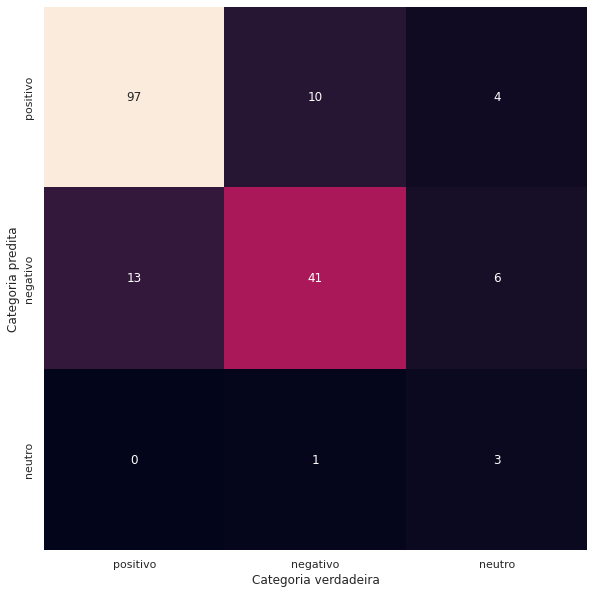

In [155]:
from sklearn.metrics import confusion_matrix

#We can print the confusion matrix to try to better understand the results
mat2 = confusion_matrix(test_labels2, predicted_labels2)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

labels_names2 = ['positivo', 'negativo', 'neutro']

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels_names2, yticklabels=labels_names2 )
plt.xlabel('Categoria verdadeira')
plt.ylabel('Categoria predita');

**4) Using another text classifier**

#### Classifier: ***Naive Bayes***

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
X_train_bow = bow.fit_transform(training_labels2)
X_train_bow.shape

(1573, 3)

In [161]:
bow.get_feature_names()[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['negativo', 'neutro', 'positivo']

In [162]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_bow)
X_train_tfidf.shape

(1573, 3)

In [163]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_tfidf, training_labels2)

In [164]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(corpus_training2, training_labels2)

In [165]:
corpus_test = corpus_training2

len(corpus_test)

1573

In [166]:
test_labels = training_labels2

len(test_labels)

1573

In [167]:
predicted = text_clf.predict(test_labels)

In [168]:
from sklearn.metrics import accuracy_score

print("Acurácia: ",accuracy_score(predicted, test_labels))

Acurácia:  0.5797838525111252


In [169]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

    negativo       0.58      1.00      0.73       912
      neutro       0.00      0.00      0.00       490
    positivo       0.00      0.00      0.00       171

    accuracy                           0.58      1573
   macro avg       0.19      0.33      0.24      1573
weighted avg       0.34      0.58      0.43      1573



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_labels, predicted)

print(mat)

[[912   0   0]
 [490   0   0]
 [171   0   0]]
